<a href="https://www.kaggle.com/code/goutham01/cat-vs-dog?scriptVersionId=159735460" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_ds = keras.utils.image_dataset_from_directory(
    directory="/kaggle/input/dogs-vs-cats/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256))

Found 20000 files belonging to 2 classes.


In [3]:
test_ds = keras.utils.image_dataset_from_directory(
    directory="/kaggle/input/dogs-vs-cats/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256))

Found 5000 files belonging to 2 classes.


In [4]:
train_ds.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

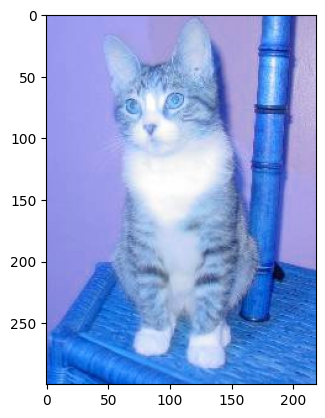

In [5]:
import cv2
train_img = cv2.imread('/kaggle/input/dogs-vs-cats/test/cats/cat.10007.jpg')
plt.imshow(train_img)

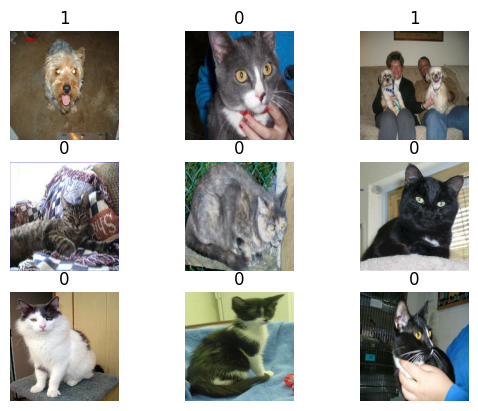

In [6]:
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy()/255.0)
        plt.title(str(labels[i].numpy()))
        plt.axis("off")

In [7]:
def process(image, label):
    image = tf.cast(image/255, tf.float32)
    return image, label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [8]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), padding="valid", activation="relu", input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop =EarlyStopping(
    monitor='val_loss',
    start_from_epoch= 0
)
earlystop

In [19]:
history = model.fit(train_ds,epochs =15,validation_data=test_ds)

Epoch 1/15
625/625 [==============================] - 36s 58ms/step - loss: 0.5201 - accuracy: 0.7468 - val_loss: 0.5482 - val_accuracy: 0.7262
Epoch 2/15
625/625 [==============================] - 33s 52ms/step - loss: 0.4962 - accuracy: 0.7570 - val_loss: 0.6292 - val_accuracy: 0.7240
Epoch 3/15
625/625 [==============================] - 33s 52ms/step - loss: 0.4635 - accuracy: 0.7747 - val_loss: 0.6643 - val_accuracy: 0.6940
Epoch 4/15
625/625 [==============================] - 34s 54ms/step - loss: 0.4350 - accuracy: 0.7934 - val_loss: 0.5925 - val_accuracy: 0.7418
Epoch 5/15
625/625 [==============================] - 33s 52ms/step - loss: 0.3940 - accuracy: 0.8135 - val_loss: 0.6028 - val_accuracy: 0.7604
Epoch 6/15
625/625 [==============================] - 33s 52ms/step - loss: 0.3577 - accuracy: 0.8300 - val_loss: 0.6128 - val_accuracy: 0.7628
Epoch 7/15
625/625 [==============================] - 33s 52ms/step - loss: 0.3326 - accuracy: 0.8457 - val_loss: 0.7549 - val_accuracy:

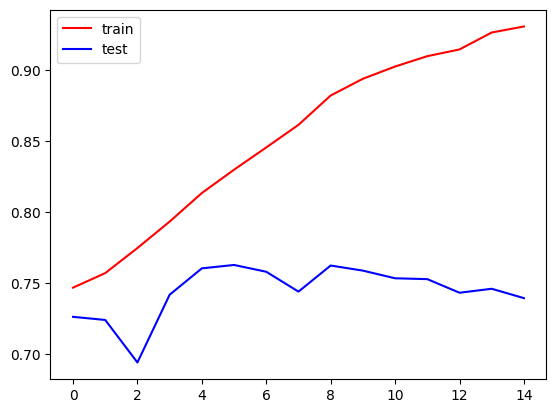

In [20]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()


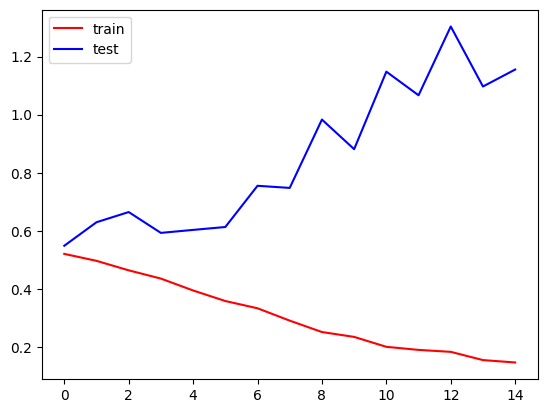

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

In [22]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [23]:
batch_size = 32

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '/kaggle/input/dogs-vs-cats/train',  # this is the target directory
        target_size=(256,256),  # all images will be resized to 256x256
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/kaggle/input/dogs-vs-cats/test',
        target_size=(256,256),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [24]:
history = model.fit(train_generator,epochs= 5,batch_size = 32,verbose = 1,
                    validation_data=validation_generator)

Epoch 1/5
625/625 [==============================] - 306s 490ms/step - loss: 0.5313 - accuracy: 0.7479 - val_loss: 0.5073 - val_accuracy: 0.7560
Epoch 2/5
625/625 [==============================] - 297s 475ms/step - loss: 0.4823 - accuracy: 0.7707 - val_loss: 0.4657 - val_accuracy: 0.7776
Epoch 3/5
625/625 [==============================] - 297s 476ms/step - loss: 0.4929 - accuracy: 0.7749 - val_loss: 0.4978 - val_accuracy: 0.7640
Epoch 4/5
625/625 [==============================] - 295s 472ms/step - loss: 0.4559 - accuracy: 0.7839 - val_loss: 0.4479 - val_accuracy: 0.7922
Epoch 5/5
625/625 [==============================] - 293s 469ms/step - loss: 0.4469 - accuracy: 0.7878 - val_loss: 0.4787 - val_accuracy: 0.7712


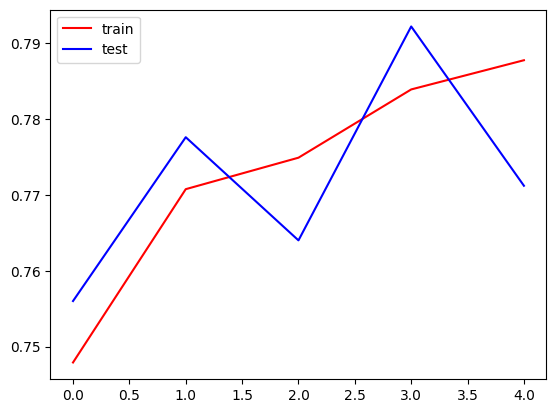

In [25]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

In [ ]:
pred = model.predict(validation_generator)
pred

In [27]:
pred = model.predict(validation_generator)
pred = np.where(pred>0.5,1,0)
pred

157/157 [==============================] - 14s 91ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
import cv2

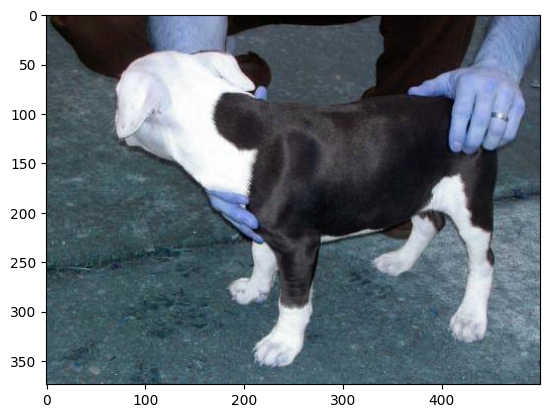

In [37]:
test_img = cv2.imread('/kaggle/input/dogs-vs-cats/test/dogs/dog.10022.jpg')
plt.imshow(test_img)

In [38]:
test_img.shape

(374, 500, 3)

In [39]:
test_img = cv2.resize(test_img,(256,256))

In [40]:
test_img.shape

(256, 256, 3)

In [41]:
test_input = test_img.reshape((1,256,256,3))

In [46]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[0.9999993]], dtype=float32)